<a href="https://colab.research.google.com/github/mathdeoliveira/Portfolio_de_DataScience/blob/master/Analisando_os_dados_do_Airbnb_Barcelona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Barcelona

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Barcelona, Espanha, e ver quais insights podem ser extraídos a partir de dados brutos.**

# Obtendo os dados
Todos os dados usados aqui foram obtidos a partir do site Inside Airbnb.

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

*   listings.csv - Summary information and metrics for listings in Barcelona (good for visualisations).




In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/catalonia/barcelona/2019-11-09/visualisations/listings.csv")

# Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

Dicionário das variáveis

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,2019-09-29,0.48,2,359
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46
4,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,182,2019-10-16,1.71,39,324


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 20428
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Com o código acima conseguimos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este dataset que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo listings.csv. Há uma versão mais completa (listings.csv.gz).

Para esse dataset, temos que: 
* Entradas:	 20428
* Variáveis:	 16

### Q2. Qual a porcentagem de valores ausentes no dataset?


In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.209321
last_review                       0.209321
host_name                         0.000832
name                              0.000734
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

Assim temos que os campos reviews_per_month e last_review tem quase 21% de seus registros nulos. O campo host_name com 0.08% e name com 0.07% de seus valores nulos. 

Temos que nenhuma coluna é populado somente com dados nulos.

### Q3. Qual o tipo de distribuição das variáveis?

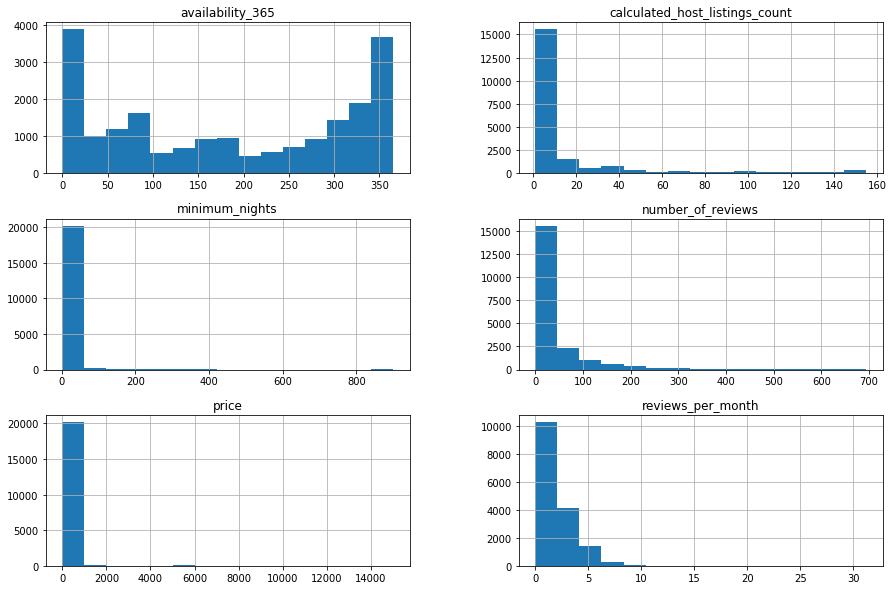

In [0]:
# plotar o histograma das variáveis númericas relevantes na análise
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].hist(bins = 15, figsize=[15,10]);

Podemos perceber em alguns gráfico que existe uma distorção dos dados, isso pode ser indícios da presença de dados outliers, a seguir vamos analisar essa possibilidade.

### Q4. Presença de dados *outliers*

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, iremos identificar por  duas maneiras diferentes que auxiliam a detecção de outliers.

In [0]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,20428.000000,20428.000000,20428.00000,16152.000000,20428.000000,20428.000000
mean,134.587429,8.736244,36.27335,1.861225,14.716370,183.984286
std,478.968270,18.702046,62.75757,1.766933,30.366928,134.907793
min,0.000000,1.000000,0.00000,0.010000,1.000000,0.000000
25%,39.000000,1.000000,1.00000,0.440000,1.000000,54.000000
50%,60.000000,2.000000,9.00000,1.320000,2.000000,179.000000
75%,105.000000,4.000000,43.00000,2.860000,11.000000,323.000000
max,15000.000000,900.000000,694.00000,31.210000,155.000000,365.000000


Com o comando describe() recebemos um resumo estatístico e podemos confirmar algumas hipóteses:
  * a variável price temos uma média de 134 unidades monetárias, mas vemos 
que 75% do total de dados estão abaixo de 105 unidades monetárias e o máximo está em 15000.

  * em minimun_nights temos um máximo de 900, sabemos que a variável é a quantidade minima de noites para reservar, isso ultrapassa a quantidade de dias de ano.

Para evidenciar os outliers por meio de gráfico, vamos plotar em um boxplot essas duas variáveis.

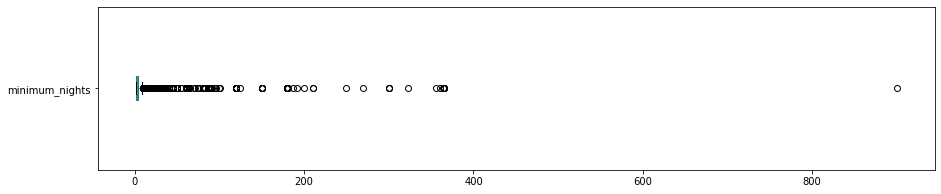

In [0]:
# boxplots das variáveis
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3));
plt.show();


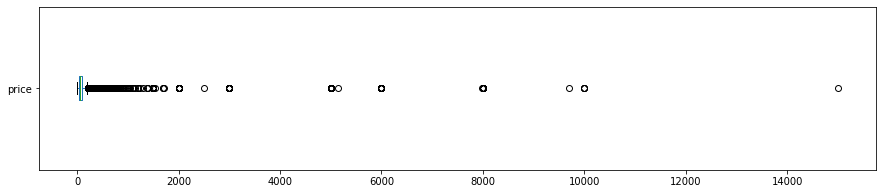

In [0]:
# boxplots das variáveis
df.price.plot(kind='box', vert=False, figsize=(15, 3));
plt.show();

#### Histograma sem os dados outliers

Validamos que existe outliers nos dados nas variáveis price e minimum_nights, vamos agora limpar esse dados do nosso dataset.
Para isso vamos escolher um intervalo específico para cada uma dessas variáveis, para escolher vamos verificar a quantidade desses intervalos.

In [0]:
# ver quantidade de valores acima de x dias para minimum_nights
dias = 30
print("minimum_nights: valores acima de", dias, "dias")
print("{} entradas".format(len(df[df.minimum_nights > dias])))
print("{:.4f}%".format((len(df[df.minimum_nights > dias]) / df.shape[0])*100))

minimum_nights: valores acima de 30 dias
3142 entradas
15.3808%


In [0]:
# ver quantidade de valores acima de x dias para price
valor = 500
print("\nprice: valores acima", valor)
print("{} entradas".format(len(df[df.price > valor])))
print("{:.4f}%".format((len(df[df.price > valor]) / df.shape[0])*100))


price: valores acima 500
464 entradas
2.2714%


Portanto, temos que, para a variável minimun_nights a quantidade de registros acima de 30 dias são 15,38% do total de dados e assim vamos remover os dados acima desse valor.

Para a variável price, a quantidade de registros acima de 500 são 2.27% do total de dados e vamos remover os dados acima desse valor.

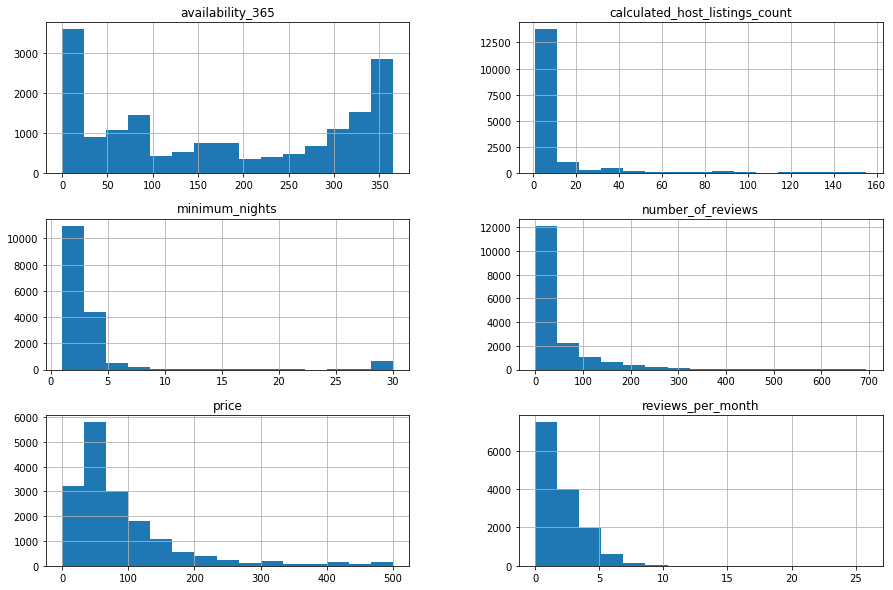

In [0]:
## remover os outliers do nosso dataset

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

## plotando novamente o histograma agora com os dados limpos
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].hist(bins = 15, figsize = [15,10]);

### Q5. Qual a correlação existente entre as variáveis

Vamos verificar o qual é o valor entre a relação de uma variável com todas as outras, nesse caso, queremos buscar uma relação de semelhança entre duas váriaveis.

Para tal, vamos criar uma matriz de correlação e após isso vamos visualizar graficamente por meio de um heatmap.

In [0]:
## criar uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.062860,0.003298,-0.103933,0.303248,0.250258
minimum_nights,-0.062860,1.000000,-0.107880,-0.170242,-0.084179,0.020409
number_of_reviews,0.003298,-0.107880,1.000000,0.476819,-0.084242,0.105538
reviews_per_month,-0.103933,-0.170242,0.476819,1.000000,-0.163025,0.008484
calculated_host_listings_count,0.303248,-0.084179,-0.084242,-0.163025,1.000000,0.227879
availability_365,0.250258,0.020409,0.105538,0.008484,0.227879,1.000000


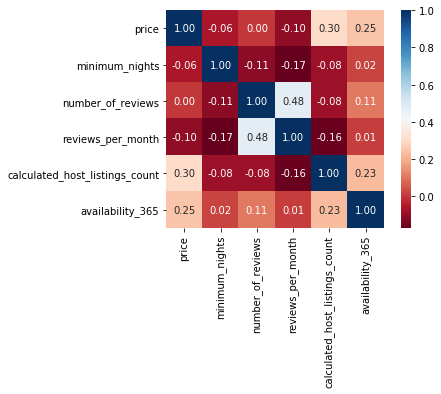

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

A variável price tem uma correlação positiva com a variável calculated_host_listings_count. Então o preço tem uma correlação com a quantidade de imóveis de um mesmo anfitrião, disponível no AirBnb, em Barcelona. Se um aumenta o outro também aumenta.

Temos também uma correlação negativa entre a reviews_per_month e minimun_nights, assim a quantidade de reviews por mês é inversamente proporcional a quantidade mínima de noites para reservar. Se uma aumenta a outra diminui.

### Q6. Qual o tipo de imóvel mais disponível para locação no Airbnb?

Em nosso dataset temos a coluna room_type, que mostra para nós o tipo de locação que está sendo anunciada no AirBnb. 

Vamos verificar a quantidade de cada um desses tipos para sabermos qual é o tipo mais disponível para locação em Barcelona.

In [0]:
# mostrar a quantidade de cada tipo de imóvel disponível

df.room_type.value_counts()

Private room       10387
Entire home/apt     9268
Hotel room           615
Shared room          158
Name: room_type, dtype: int64

In [0]:
# mostrar a porcentagem de cada um desses tipos de imóvel disponível

(df.room_type.value_counts() / df.shape[0]) * 100

Private room       50.846877
Entire home/apt    45.369101
Hotel room          3.010574
Shared room         0.773448
Name: room_type, dtype: float64

Portanto temos o seguinte resultado:


1.   Quartos privados com 50,84%
2.   Casa/Apto inteiros com 45.36%
3.   Quarto de hotel com 3.01%



### Q7. Qual o bairro mais caro de Barcelona?

Vamos fazer uma comparação dos preços médio de locação entre os 10 primeiros bairros de Barcelona.

In [0]:
df.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:10]

neighbourhood
la Marina del Prat Vermell                      656.428571
Sant Gervasi - la Bonanova                      344.796296
Sant Antoni                                     249.572573
la Dreta de l'Eixample                          245.116246
el Putxet i el Farró                            237.745690
la Font d'en Fargues                            236.300000
Diagonal Mar i el Front Marítim del Poblenou    233.524752
la Vila de Gràcia                               212.223708
l'Antiga Esquerra de l'Eixample                 195.201112
la Vila Olímpica del Poblenou                   193.729730
Name: price, dtype: float64

Com o resultado acima devemos levantar algumas dúvidas, não sou de Barcelona e nunca estive lá, portanto não posso afirmar que esses valores estão corretos pois não tenho a experiência, para isso podemos fazer algumas pesquisas acerca desses bairros no Google e analisar.

Vamos, por exemplo, pesquisar sobre o bairro La Marina del Prat Vermell. Temos a resposta:  
  * *La Marina del Prat Vermell é um bairro no distrito de Sants-Montjuïc, em Barcelona, ​​na Catalunha. O nome vem de campos que ocupavam essa área de parte baixa da Marina de Sants. Este é um novo bairro em desenvolvimento entre o outro setor da Marina de Sants, a Marina de Port e a área industrial da Zona Franca*

Um bairro novo em desenvolvimento tem média alta de preço de locação. Necessário uma análise para verificar se a quantidade de dados valida a média.

In [0]:
# ver a quantidade de imóveis para la Marina del Prat Vermell

bairro = "la Marina del Prat Vermell"
df[df.neighbourhood == bairro].shape[0]


14

Somente 14 registros do total de 20428 registros.

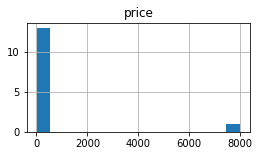

In [0]:
df[['price']][df.neighbourhood == bairro].hist(bins = 15, figsize = [4,2]);

Podemos ver que existe um outlier, vamos usar o nosso dataset limpo de outliers

In [0]:
# ver a quantidade de imóveis para la Marina del Prat Vermell com o dataset limpo

bairro = "la Marina del Prat Vermell"
df_clean[df_clean.neighbourhood == bairro].shape[0]

13

Foi retirado um registro que foi considerado um outlier.

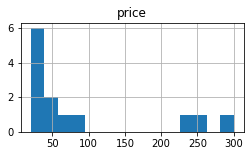

In [0]:
df_clean[['price']][df_clean.neighbourhood == bairro].hist(bins = 15, figsize = [4,2]);

Confirmamos agora que dados outliers acaba impactando no resultado final, assim vamos fazer o mesmo processo agora usando os dados limpos.

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)[:10]

neighbourhood
la Vila Olímpica del Poblenou                   150.133333
la Dreta de l'Eixample                          145.066077
Diagonal Mar i el Front Marítim del Poblenou    134.341317
Vallvidrera, el Tibidabo i les Planes           124.400000
les Tres Torres                                 121.703704
l'Antiga Esquerra de l'Eixample                 107.704148
el Putxet i el Farró                            105.010695
el Carmel                                        98.952381
Sant Gervasi - Galvany                           98.240143
la Vila de Gràcia                                96.649496
Name: price, dtype: float64

Agora, podemos analisar os resultados e verificar se faz algum sentindo termos esses resultados. Seguindo o procedimento de pesquisar no Google, temos a seguinte resposta para o um dos bairros da lista la Dreta de l'Eixample:
* Edifícios de apartamentos em art nouveau se espalham pelas largas avenidas da exuberante Dreta de l'Eixample, um bairro definido pela arquitetura de Antoni Gaudí, como La Sagrada Familia, Casa Batlló e La Pedrera. Boutiques internacionais e restaurantes sofisticados se agrupam ao longo do Passeig de Gràcia e da Rambla de Catalunya, enquanto as lojas de departamentos e os cafés ao ar livre ocupam um movimentado centro de transporte público, a Plaça de Catalunya.

Faz mais sentindo termos esse bairro como um dos bairros mais caros para a locação de imóvel.

##### Mostrar a localização de cada imóvel em um mapa
Temos no nosso dataset os valores de latitude e longitude, com isso podemos plotar os imóveis por meio do *scatter plot*.

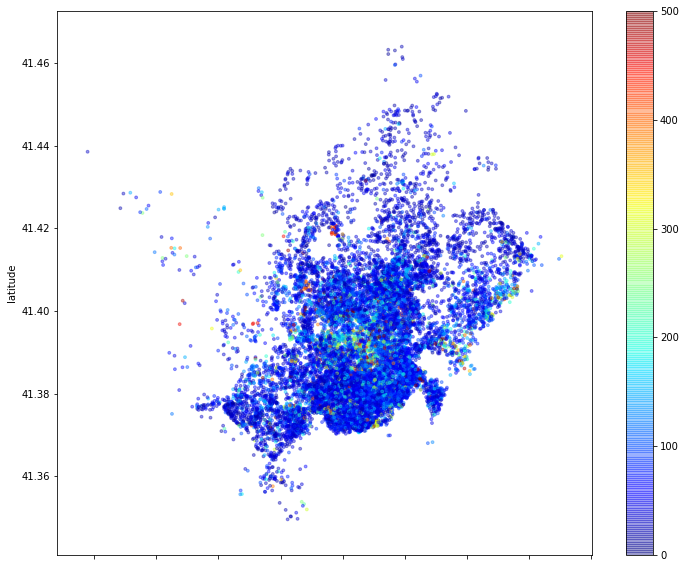

In [0]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,10));

### Q8. Qual são os locadores TOP 5 com as maiores quantidades de imóveis disponíveis para locação?

Queremos saber a quantidade de imóveis para os 5 maiores locadores que estão anunciando para locação no Airbnb para a cidade de Barcelona, Espanha.

In [0]:
## Criado um dataframe com os cinco maiores locadores, devemos agrupar por host_id pois podemos ter nomes iguais, mas IDs diferentes.
df_top5_locadores = pd.DataFrame(df.groupby(['host_id', 'host_name']).size().sort_values(ascending = False).head(5))
df_top5_locadores

,,0
host_id,host_name,
102947901,Claudia,155
170716140,Rada & Jacques,154
4459553,Eva&Jack,140
158023606,"Sito, Habitat Apartments",128
171236207,Apartment Barcelona,114


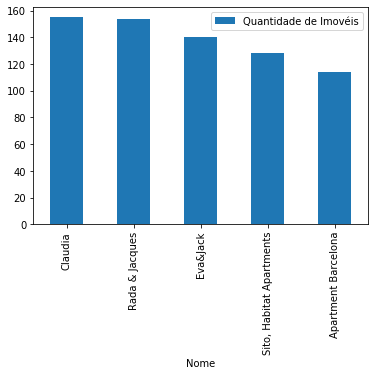

In [0]:
## foi criado um MultiIndex, vamos transformar o MultiIndex em duas colunas para o nosso DataFrame e após isso vamos retirar o ID, não será mais necessário.
## Assim podemos renomear os nomes das nossas colunas
## Vamos visualizar em forma de gráfico de barras a quantidade de imóveis
df_top5_locadores.reset_index(level=['host_id','host_name'], inplace=True);
df_top5_locadores = df_top5_locadores.drop(['host_id'], axis=1);
df_top5_locadores.columns = ['Nome','Quantidade de Imovéis']
df_top5_locadores.plot(kind = 'bar', x= 'Nome');

### Conclusões

A análise acima foi feito com um dataset resumido disponibilizado pela própria Airbnb, mas podemos identificar que:
* Existência de dados outliers distorcendo os resultados estatísticos de algumas variáveis;
* A quantidade de valores ausentes é uma porcentagem pequena, podemos trabalhar com os dados após a retirada dos nulos;
